# Personalisation in Online Education 
## Data Cleaning - Feature Generation - EDA - Student Segmentation

## ---------------- Outline ---------------- ##
<a href="#section1">1. Purpose and Content</a>

<a href="#section2">2. Data Cleansing</a>
- <a href="#section2.1">2.1 Missing Values</a>
- <a href="#section2.2">2.2 Sematic Error Search</a>
    - <a href="#section2.2.1">Consistency between Final Result and Unregistration</a>
    - <a href="#section2.2.2">Consistency of Weights of Assesments</a>


<a href="#section3">3. Deriving New Variables</a><br></br>
- <a href="#section3.1">3.1 Final Marks</a>
    - <a href="#section3.1.1">Important Note</a>
    - <a href="#section3.1.2">Consistency between "mark" and "final_result"</a>
    - <a href="#section3.1.3">Strategy For Success Measure Derivation</a>
    
<a href="#section4">4. Exploratory Data Analysis (EDA)</a> <br></br>
- <a href="#section4.1">4.1 Highest Education - Final Result</a>
- <a href="#section4.2">4.2 Imd_band - Final Result</a>
- <a href="#section4.3">4.3 Summary of EDA Findings & Plan for Student Segmentation</a>

<a href="#section5">5. Student Segmentation</a>

## ---------------- Outline ---------------- ##

<a id="section1"></a>
# 1. Purpose and Content

- Clean, cure and increase the quality of a messy dataset by handling missing values, inconsistencies and anomalies in the dataset.

- Derive new variables to create different and reliable measures of student success. Also, generate new features that can be the actual influencer of student success.

- Profile students using demographical information to investigate difference between the factors effecting the success of different groups of students.

<a id="section2"></a>
# 2.Data Cleansing
This part of the notebook will focus on handling the missing values and semantic errors.

In [1]:
# Required packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import missingno as msno
from plotnine import *
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Datasets
course = pd.read_csv('/kaggle/input/student-demographics-online-education-dataoulad/courses.csv')
assesment = pd.read_csv('/kaggle/input/student-demographics-online-education-dataoulad/assessments.csv')
vle = pd.read_csv('/kaggle/input/student-demographics-online-education-dataoulad/vle.csv')
info_stu = pd.read_csv('/kaggle/input/student-demographics-online-education-dataoulad/studentInfo.csv')
reg_stu = pd.read_csv('/kaggle/input/student-demographics-online-education-dataoulad/studentRegistration.csv')
as_stu = pd.read_csv('/kaggle/input/student-demographics-online-education-dataoulad/studentAssessment.csv')
vle_stu = pd.read_csv('/kaggle/input/student-demographics-online-education-dataoulad/studentVle.csv')

In [3]:
# Code module and code presentation are always used together to identify a module. 
# Therefore, these 2 column will be merged to create a feature which uniquely identifies a module.

course["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), course.code_module, course.code_presentation))
assesment["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), assesment.code_module, assesment.code_presentation))
vle["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), vle.code_module, vle.code_presentation))
info_stu["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), info_stu.code_module, info_stu.code_presentation))
reg_stu["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), reg_stu.code_module, reg_stu.code_presentation))
vle_stu["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), vle_stu.code_module, vle_stu.code_presentation))


print(" In Student Info table; \n # of rows: {} \n # of unique student Ids: {} \n \
Hence, There are different records for same students' different modul enrolments." .format(len(info_stu),len(info_stu.id_student.unique())))
print("\n This also means that student ID is not really a unique identifier of the table.\n")

 In Student Info table; 
 # of rows: 32593 
 # of unique student Ids: 28785 
 Hence, There are different records for same students' different modul enrolments.

 This also means that student ID is not really a unique identifier of the table.



<a id="section2.1"></a>
## 2.1 Missing Values

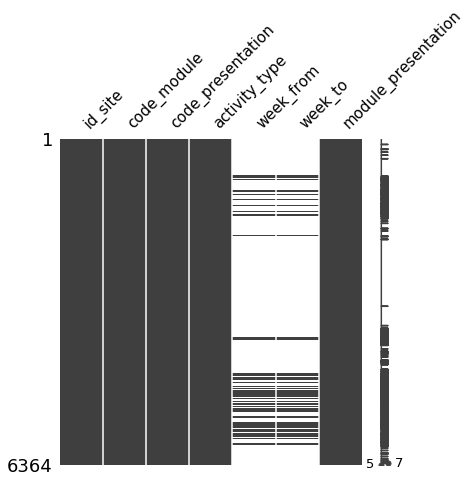

In [4]:
# Missing value plot for vle 
msno.matrix(vle, figsize=(6,6), fontsize=15)

- Most of the entries of 'week_from' and 'week_to' attributes are missing so the analysis will not be focusing on the dates.

- In order to get ride of the extra load on memory, these columns will be dropped in the next step.

In [5]:
vle.drop(columns=['week_from','week_to'],inplace=True)

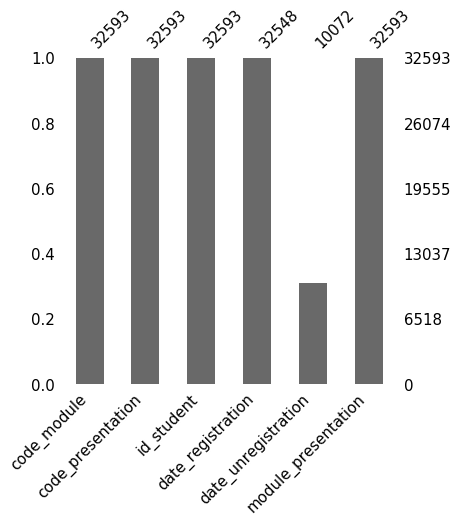

In [6]:
msno.bar(reg_stu, figsize=(6,6), fontsize=15)

- 70% of the rows are missing date_unregistration. This means that 70% of the students don't withdraw the modules.

<a id="section2.2"></a>
## 2.2 Sematic Error Search
<a id="section2.2.1"></a>
### Consistency between Final Result and Unregistration

In [7]:
#Find unregistered students according to registration table. 
#Then check whether they are consistent with the final results at StudentInfo table. 
#If a student is unregistered, final result must be recorded as "Withdrawn".


#Select unregistered students according to registration table
temp = reg_stu.loc[reg_stu.date_unregistration.notna(),\
                               ['id_student','module_presentation','date_unregistration']]

# Join to see matching rows
temp =pd.merge(info_stu, temp, on=['id_student','module_presentation'])

# Unregistered students without a "Withdrawn" in final result column 
# Semantic Error -- If a student unregistered, have to have "Withdrawn" as final result! 
wrong_final_results=temp.loc[temp.final_result!='Withdrawn']
incorrect_final_results=wrong_final_results.index
wrong_final_results

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation,date_unregistration
719,BBB,2013J,362907,F,South West Region,Lower Than A Level,20-30%,35-55,2,60,N,Fail,BBB_2013J,0.0
724,BBB,2013J,365288,F,South Region,A Level or Equivalent,70-80%,0-35,0,60,N,Fail,BBB_2013J,0.0
869,BBB,2013J,554243,F,South West Region,Lower Than A Level,60-70%,0-35,0,60,N,Fail,BBB_2013J,166.0
4961,DDD,2013J,315082,M,West Midlands Region,A Level or Equivalent,50-60%,0-35,0,60,N,Fail,DDD_2013J,0.0
5010,DDD,2013J,403052,F,Yorkshire Region,HE Qualification,20-30%,0-35,0,150,N,Fail,DDD_2013J,0.0
5293,DDD,2013J,582954,M,London Region,Lower Than A Level,10-20,0-35,0,120,N,Fail,DDD_2013J,-7.0
7853,FFF,2013J,234004,M,Yorkshire Region,A Level or Equivalent,50-60%,0-35,0,60,N,Fail,FFF_2013J,0.0
8001,FFF,2013J,523777,M,North Region,A Level or Equivalent,0-10%,35-55,1,60,N,Fail,FFF_2013J,0.0
8340,FFF,2013J,601640,M,London Region,HE Qualification,20-30%,0-35,0,90,N,Fail,FFF_2013J,-4.0


- 8 of these 9 students unregistered at the first day of the module presentation or earlier (by looking date_unregistration column), this may be a cause for that inconsistency.
- This also makes a "Fail" impossible as a final result. The above 9 records' final_result entry will be changed into Withdrawn in the next step.

In [8]:
# Correction info_stu table's final_result entries
for i in wrong_final_results[['id_student','code_module','code_presentation']].values:
    info_stu.loc[(info_stu.id_student==i[0])&(info_stu.code_module==i[1])&\
                 (info_stu.code_presentation==i[2]),'final_result'] = 'Withdrawn'

<a id="section2.2.2"></a>
### Consistency of Weights of Assesments

As mentioned under Assessments table explanation, weights of the exams should sum up to %100 and other assessments should sum up to %100. Hence, total weight for each module_presentation should be 200.

In [9]:
assesment.groupby(['code_module','code_presentation']).agg(total_weight = ('weight',sum))

total_weight
code_module code_presentation              
AAA         2013J                     200.0
            2014J                     200.0
BBB         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
CCC         2014B                     300.0
            2014J                     300.0
DDD         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
EEE         2013J                     200.0
            2014B                     200.0
            2014J                     200.0
FFF         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
GGG         2013J                     100.0
            2014B                     100.0
            2014J                     100.0

Module CCC adds up to 300 and module GGG adds up to 100 -- these 2 will be investigated.

In [10]:
assesment[assesment.code_module.isin(["CCC","GGG"])]\
.groupby(['code_module','code_presentation',"assessment_type"]).agg(type_weights = ('weight',sum))

type_weights
code_module code_presentation assessment_type              
CCC         2014B             CMA                      25.0
                              Exam                    200.0
                              TMA                      75.0
            2014J             CMA                      25.0
                              Exam                    200.0
                              TMA                      75.0
GGG         2013J             CMA                       0.0
                              Exam                    100.0
                              TMA                       0.0
            2014B             CMA                       0.0
                              Exam                    100.0
                              TMA                       0.0
            2014J             CMA                       0.0
                              Exam                    100.0
                              TMA                       0.0

- Module CCC has an inconsistency. Total exam weight is 200%. Module CCC has 2 exams in every presentation so It is very likely to be entered as 2 times 100% instead of 50% and 50%. This will be fixed in the upcoming step.
- Also Module GGG is incompatible. There is no weight assigned neither to TMA type nor to CMA type. For convenience TMA type assignments' weight will be imputed as to add up to 100.

In [11]:
# Weights of exams are halved for module CCC
assesment.loc[(assesment.code_module=='CCC') &(assesment.assessment_type=='Exam'),'weight'] = \
assesment.loc[(assesment.code_module=='CCC') &(assesment.assessment_type=='Exam'),'weight']/2

# Weights of TMA type assessments arranged to be %100.
assesment.loc[(assesment.code_module=='GGG') & (assesment.assessment_type=='TMA'),'weight']=(100/3)


<a id="section3"></a>
# 3.Deriving New Variables

Once, Syntactic and semantic errors are handled, present variables are more trustable so new variables can be deriven with confidence from the given dataset. It is important to handle possible error sources before generating new features to avoid propagation of the existing errors and anomalies.

<a id="section3.1"></a>
## 3.1 Final Marks
In order to end up with an additional success measure of students, weight and score of each assessment for every student are multiplied then summed up and stored in a newly created attribute total_scoreweight and total weight of assessment for every student in every presentation of courses are recorded at total_weight attribute. Then by dividing the total_scoreweight to total_weight average mark is calculated and put into final_mark attribute.

- It was important to calculate one more success measure (i.e final_mark) other than final_result because final_result is not a ccontinous variable.

In [12]:
# Calculation of the marks by merging 2 tables to have assignment scores and weights together in one table.

# Join Assessment and StudentAssessment tables
joined=pd.merge(as_stu,assesment,on='id_assessment',how='left')
# Calculate weighted scores for all assessments of all students
joined['score*weight']=(joined['score']*joined['weight'])

# Sum up score*weights and divide by total weights (There are some students has total weight higher or much lower than %100)
# for all students of all modules to calculate final mark.
marks=joined.groupby(['id_student','code_module','code_presentation'],as_index=False)['score*weight','weight'].sum()

marks['adjusted_mark'] = marks['score*weight']/marks['weight']
marks["mark"]  = marks['score*weight']/200
marks.rename(columns = {'score*weight': 'total_score*weight', 'weight': 'attempted_weight'}, inplace=True)
marks = marks.round(1)

<a id="section3.1.1"></a>
### Important Note

As mentioned under studentAssesment table's score column explanation, students with a final mark lower than 40 ends up with final result of "Fail".

Therefore, if the value of newly derived variable "final_mark" is lower than 40, that student is expected to have a "Fail" as a final result. Unfortunatelly, this is not the case.
There can be 2 reasons for that:
- First, sum of the students total_weight value doesn't adds up to 200 (Total weight of all assessments for all modules). This implies that these students failed to attempt all of the assessments.
    - If this is the case, students would get a 0 for their unattempted assessments.
    - "mark" variable is calculated with this approach by assigning a 0 for missing assessment marks.



- Second interpretation can be, eventhough these students have attempted more assessments than given in the dataset, marks of other assessments are not included in the dataset.
    - If this is the case, unattempted assessments are ignored.
    - Weighted average of the assessment marks that are included in the dataset (attempted assessments) are calculated and recorded as "adjusted_mark". 


<a id="section3.1.2"></a>
### Consistency between "mark" and "final_result"

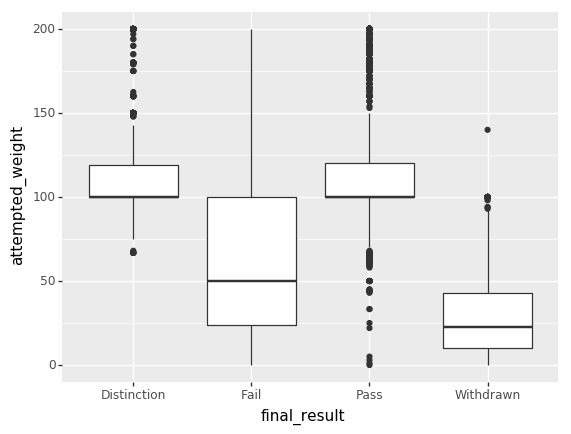

<ggplot: (8793047851805)>

In [13]:
# Merging the marks table with info_stu to have a bigger table 
# containing all the relevant information about success, student characteristics and demographics.
joined = pd.merge(marks,info_stu,on=['id_student','code_module','code_presentation'],how='left')

# There can be students who attempt some of the assignments but then withdraw the course,
# mark variable may have a value for these students.
# These marks shouldn't be used in analysis so will be replaced with NaN as follows.
joined.loc[joined.final_result=='Withdrawn','mark']= np.nan
joined.loc[joined.final_result=='Withdrawn','adjusted_mark']= np.nan

ggplot(joined) + geom_boxplot(aes(x="final_result", y="attempted_weight"))

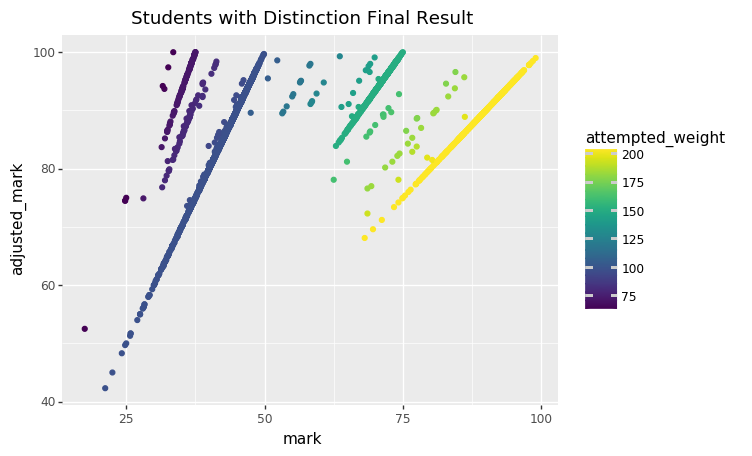

<ggplot: (8793047861231)>

In [14]:
ggplot(joined[joined.final_result=="Distinction"]) + geom_point(aes(x="mark", y="adjusted_mark", color="attempted_weight"))\
+ggtitle("Students with Distinction Final Result")

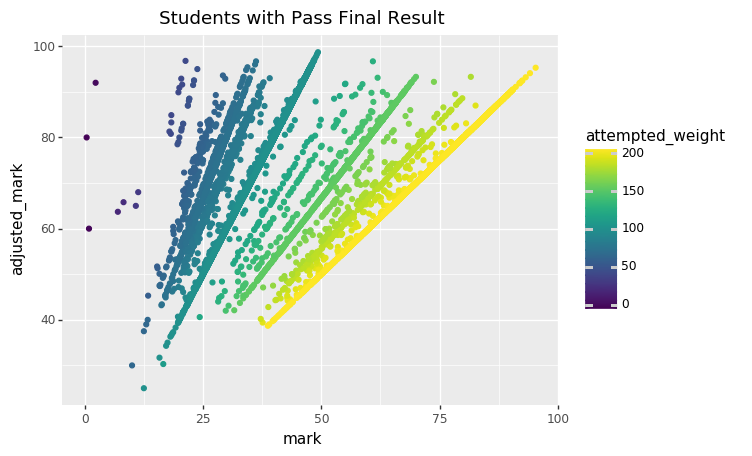

<ggplot: (-9223363243731364643)>

In [15]:
ggplot(joined[joined.final_result=="Pass"]) + geom_point(aes(x="mark", y="adjusted_mark", color="attempted_weight"))\
+ggtitle("Students with Pass Final Result")

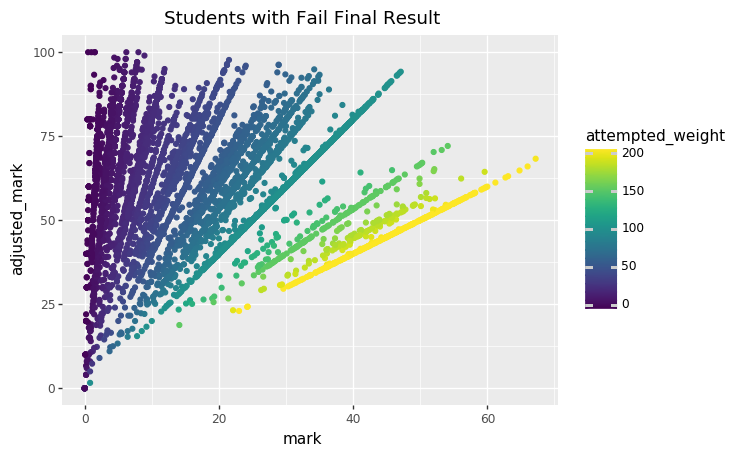

<ggplot: (-9223363243731364622)>

In [16]:
ggplot(joined[joined.final_result=="Fail"]) + geom_point(aes(x="mark", y="adjusted_mark", color="attempted_weight"))\
+ggtitle("Students with Fail Final Result")

By comparing the above 3 graphs;
- Difference between adjusted_mark and mark is much higher for "Fail" students.
    - Suggesting that these students probably didn't attempted these missing assessments indeed. Issue is not about being included in the dataset.


- For the attempted weight of 200 (attempting all assessments);
    - Almost all Distinction results are higher than 70.
    - Almost all Pass marks are higher than 40
        - **Therefore, 0-40 band will be accapted as "Fail", 40-70 band will be accapted as "Pass" and 70-100 as "Distinction".**
 
Next questions is, how to handle inconsistencies in the data such as there are students failed with a 70.

***
<a id="section3.1.3"></a>
### Strategy For Success Measure Derivation

**Main strategy will be deriving the adjusted_mark value depending on attempted_weight. High attempted_weight suggest trusting on adjusted_mark or mark whereas if it is low, relying on final_result label makes more sense.**



**For students with "Distinction"**
- If they have attempted_weight of 200 (attempted all assessments), their final_result will be decided according to adjusted_mark and mark (same in this case). In this case individual assessment marks are more trustworthy compared to final_result value because they add up to expected value 200.
- If they have attempted_weight between 150 and 200;
    - If adjusted_mark> 70 --> accept as it is
    - If adjusted_mark < 70 --> grey points, leave as it is
- If they have attempted_weight lower than 150, uncertainity is high for adjusted_mark. Therefore, we will mostly trust on final_result labels.These points will be ordered according to "mark" value and retaining their order, their adjusted_mark value will be assigned between 70 and 100 according to their order.
    
   

**For students with "Pass"**
- If they have attempted_weight of 200 (attempted all assessments), their final_result will be decided according to adjusted_mark and mark (same in this case).
- If they have attempted_weight between 150 and 200, 
    - If adjusted_mark > 80 --> accept adjusted_mark, assign Distinction
    - If adjusted_mark < 80 --> grey points, leave as it is

- If they have attempted_weight lower than 150, again, high uncertainty of "mark". Therefore, we will mostly trust on final_result labels.These points will be ordered according to mark value and retaining their order, their adjusted_mark value will be assigned between 40 and 70 according to their order. This approach is used again because with decreasing total_weight, we mostly rely on already given final_result value. Therefore, assigned adjusted_mark according to given "Pass" label.
    
    
**For students with "Fail"**
- If they have attempted_weight of 200 (attempted all assessments), their final_result will be decided according to adjusted_mark and mark (same in this case).
- If they have attempted_weight between 150 and 200,
    - mark > 40 --> adjusted_mark = mark and label = "Pass"
    - mark < 40 --> grey points, leave as it is
- If they have attempted_weight lower than 150. Again, uncertainity is high. Rely on final_result.Same approach will be followed as in "Pass" and "Distinction" sections. These values will be ordered according to mark value and retaining their order, their adjusted_mark value will be assigned between 0 and 40 according to their order.
    

In [17]:
distinction = joined[joined.final_result=="Distinction"].index
passing = joined[joined.final_result=="Pass"].index
fail = joined[joined.final_result=="Fail"].index
withdraw = joined[joined.final_result=="Withdraw"].index


attempt_weight200 = joined[joined.attempted_weight==200].index
attempt_weight150_200 = joined[(joined.attempted_weight>=150) & (joined.attempted_weight!=200)].index
attempt_weight0_150 = joined.index.difference(attempt_weight200).difference(attempt_weight150_200)

adj_mark80_100 = joined[joined.attempted_weight>=80].index
adj_mark70_80 = joined[(joined.attempted_weight>=70) & (joined.attempted_weight<80)].index
adj_mark0_70 = joined[joined.attempted_weight<70].index

mark40_100 = joined[joined.attempted_weight>=40].index
mark0_40 = joined[joined.attempted_weight<40].index

In [18]:
# Students with attempted_weight 200
joined.loc[(attempt_weight200) & (adj_mark80_100), "final_result"] = "Distinction"
joined.loc[(attempt_weight200) & (adj_mark70_80), "final_result"] = "Pass"
joined.loc[(attempt_weight200) & (adj_mark0_70), "final_result"] = "Fail"

# Students with attempted_weight between 150 and 200
joined.loc[(attempt_weight150_200) & (passing) & (adj_mark80_100), "final_result"] = "Distinction"
joined.loc[(attempt_weight150_200) & (fail) & (mark40_100), "final_result"] = "Pass"
joined.loc[(attempt_weight150_200) & (fail) & (mark40_100), "adjusted_mark"] = joined.loc[(attempt_weight150_200) & (fail) & (mark40_100), "mark"]

# Students with attempted_weight lower than 150 -- Ordering and reassigning adj_mark as explained above
joined.loc[joined.loc[(attempt_weight0_150) & (distinction)].mark.sort_values().index,"adjusted_mark"] = np.arange(70.0, 100.0, 30/len(joined.loc[(attempt_weight0_150) & (distinction)]))
joined.loc[joined.loc[(attempt_weight0_150) & (passing)].mark.sort_values().index,"adjusted_mark"] = np.arange(40.0, 70.0, 30/len(joined.loc[(attempt_weight0_150) & (passing)]))
joined.loc[joined.loc[(attempt_weight0_150) & (fail)].mark.sort_values().index,"adjusted_mark"] = np.arange(0.0, 40.0, 40/len(joined.loc[(attempt_weight0_150) & (fail)]))

df = joined

<a id="section4"></a>
# 4. Exploratory Data Analysis (EDA)

To understand possible predictors of student success, EDA will be performed on df called joined. One can easily try to relate student characteristics and demographics such as education level, deprevation index of student's location, presence of disabilty, age band with student success measures.

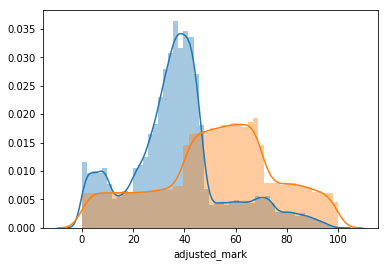

In [19]:
sns.distplot(df.loc[df.mark.notnull(),"mark"])
sns.distplot(df.loc[df.adjusted_mark.notnull(),"adjusted_mark"])

- "adjusted_mark" variable is more balanced though looks artificial, probably due to linear distribution of marks that have total_weight lower than 150.
- "mark" is a little right skewed probably due to missing assignments are calculated as 0. Some of these assignments are not really zero.
- "adjusted_mark" is more optimistic measure in terms of student success. 

[Text(0, 0, 'Pass'),
 Text(0, 0, 'Distinction'),
 Text(0, 0, 'Fail'),
 Text(0, 0, 'Withdrawn')]

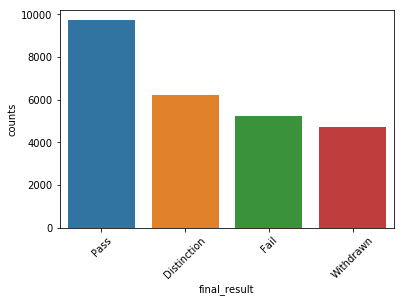

In [20]:
result_counts =  pd.DataFrame(df.final_result.value_counts()).reset_index()
result_counts = result_counts.rename(columns={"index": "final_result", "final_result":"counts"})

chart = sns.barplot(x="final_result", y="counts"  ,data=result_counts)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

- "final_result" is fairly uniform relative to "mark". One can claim that "final_result" and "adjusted_mark" look consistent.

[Text(0, 0, 'A Level or Equivalent'),
 Text(0, 0, 'Lower Than A Level'),
 Text(0, 0, 'HE Qualification'),
 Text(0, 0, 'Post Graduate Qualification'),
 Text(0, 0, 'No Formal quals')]

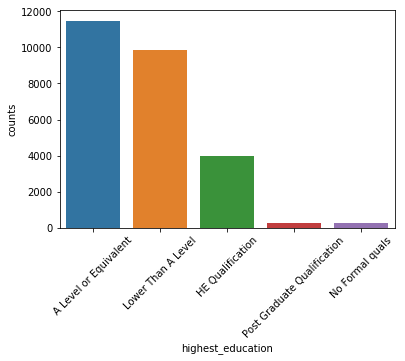

In [21]:
education_counts =  pd.DataFrame(df.highest_education.value_counts()).reset_index()
education_counts = education_counts.rename(columns={"index": "highest_education", "highest_education":"counts"})

chart = sns.barplot(x="highest_education", y="counts"  ,data=education_counts)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

- Very few students have a university degree or higher.
- Due to lack of data points, it can be a good idea to merge groups into 2 such as "HE or higher" and "Level or lower".

In [22]:
# Merge highest_education groups into 2 main groups
df["edu"] = list(map(lambda x: "HE or higher" if (x in ["HE Qualification", "Post Graduate Qualification"]) \
                else "Level or lower",df.highest_education))

df = df.drop(["total_score*weight","highest_education","module_presentation"], axis=1)

In [23]:
# Clicks for each id_site for all enrolments of all students
clicks = pd.merge(vle_stu, vle, on=["id_site"])
clicks = clicks.loc[:,["code_module_x","code_presentation_x","id_student","id_site","date","sum_click","activity_type"]]
clicks.rename(columns = {'code_module_x': 'code_module', 'code_presentation_x': 'code_presentation'}, inplace=True)

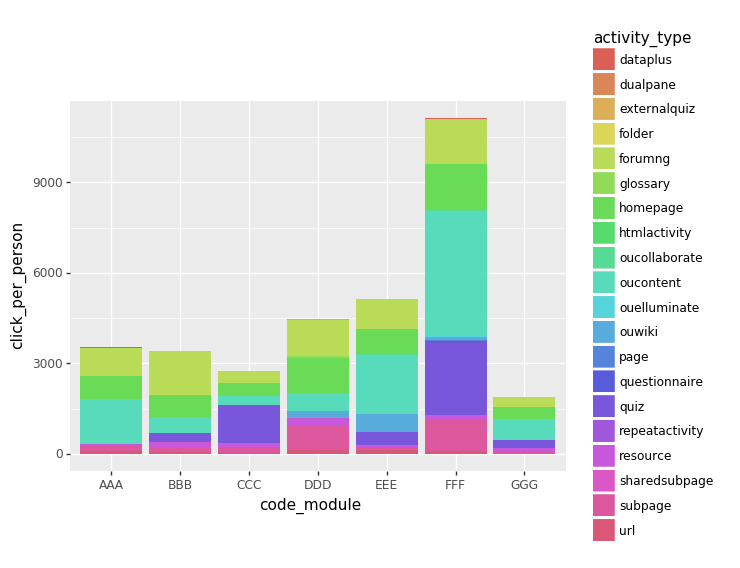

<ggplot: (8793047834972)>

In [24]:
# Number of students for each module and presentation
number_of_students = df.groupby(["code_module","code_presentation"])\
    .agg(stu_count =("id_student", lambda x: x.nunique())).reset_index()

# Total number of clicks
grouped_clicks = clicks.groupby(["code_module","code_presentation","activity_type"])\
.agg(total_click = ("sum_click",sum)).reset_index()

# Clicks per person
grouped_clicks=pd.merge(grouped_clicks, number_of_students, on=["code_module","code_presentation"], how="left")
grouped_clicks["click_per_person"] = (grouped_clicks["total_click"]/grouped_clicks["stu_count"]).round(1)

# Draw a stacked bar chart
ggplot(grouped_clicks, aes(fill="activity_type", y="click_per_person", x="code_module")) + \
    geom_bar(position="stack", stat="identity")

<a id="section4.1"></a>
## 4.1 Highest Education - Final Result

In [25]:
# Final result counts for 2 different education level under "edu"
result_counts = pd.DataFrame(df.groupby(["edu"]).final_result.value_counts())\
    .rename(columns={"final_result":"counts"}).reset_index()

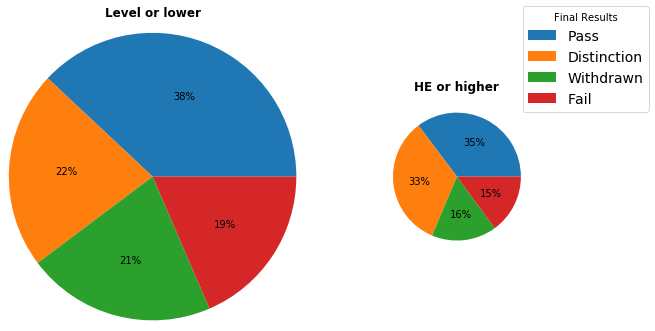

In [26]:
# Draw the pie charts
labels = list(result_counts.final_result.unique())
fracs1 = list(result_counts.iloc[4:,].counts)
fracs2 = list(result_counts.iloc[:4,].counts)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(321)
ax1.pie(fracs1, radius=np.sqrt(sum(fracs1)/sum(fracs2)), autopct='%.0f%%')
ax1.set_title("Level or lower", fontdict={'fontweight':"bold"}, pad=80)


ax2 = fig.add_subplot(322)
ax2.pie(fracs2,  autopct='%.0f%%')
ax2.set_title("HE or higher", fontdict={'fontweight':"bold"})


fig.legend(labels=labels, title="Final Results",prop={'size': 14})
plt.show()

- Distinction rate increases from 22% to 33% for increased education level
- Pass rates are quite similar.
- Withdraw rate is slightly lower for high education group
- Fail rate is also slightly lower for high education group

From this results, "edu" variable can be a predictor of the students success as expected from intuition.

<a id="section4.2"></a>
## 4.2 Imd_band - Final Result

In [27]:
# Calculate mean adjusted_mark for each imd_band
df.groupby(["imd_band"]).agg(avg_adjusted_mark=("adjusted_mark",lambda x: x.mean()))

,avg_adjusted_mark
imd_band,
0-10%,44.834685
10-20,46.297778
20-30%,49.543186
30-40%,51.897490
40-50%,52.105815
50-60%,52.037097
60-70%,55.329062
70-80%,54.403407
80-90%,56.618349


- By looking at the average adjusted mark of students from different imd_band values (imd_band is deprivation index of the area that students live), we can see that students are more likely to be more successful in deprivated areas. 

**This result can sound unintuitive because in traditional education system (Inclass education), It is a well-known fact that students in developed areas are more likely to be successfull. This result implies that in online education, some dynamics can be different such as the effect of level of development of the area that students are located.**

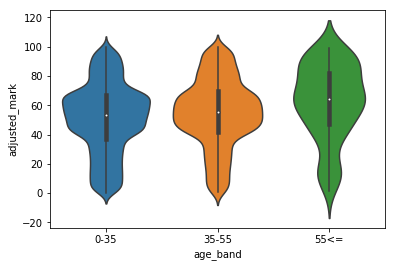

In [28]:
# Distribution of adjusted_mark for different age groups
sns.violinplot(x=df.age_band, y=df.adjusted_mark, order=["0-35", "35-55","55<="])

- Orange and green distributions are getting wider towards the upper side of the graph. Hence, increasing age group is a signal for a higher mark from the violine plot above. 

***
<a id="section4.3"></a>
## 4.3 Summary of EDA Findings & Plan for Student Segmentation
- Depriviation index of the location
- Educational background 
- Age 

The above characteristics of student can be related with success. Therefore, I will divide the students into 2 groups according to above characteristics. High deprivation index, strong educational background and older students will be the group that is most likely to be successful whereas low deprivation index, low level of educational background and younger students will be the group that is least likely to be successful. 

To understand which group is benfiting from what kind of online materials presented in VLE, correlation analysis will be performed using number of clicks information and the final marks of the students in different groups. 

<a id="section5"></a>
# 5. Student Segmentation

In [29]:
# Divide students into 2 groups as explained above
group1 = df[df.imd_band.isin(["90-100%","80-90%","70-80%","60-70%","50-60%"])\
   &(df.edu=="HE or higher")&(df.age_band.isin(["55<=","35-55"])) &(df.adjusted_mark.notna())]

group2 = df[(df.imd_band.isin(['30-40%','20-30%','10-20','40-50%','0-10%']))\
   &(df.edu=="Level or lower")&(df.age_band=="0-35")&(df.adjusted_mark.notna())]

print("Number of students in group1 (more likely to be succesfull): {} \nNumber of students in group2 (less likely to be succesfull): {}"\
     .format(len(group1),len(group2)))

Number of students in group1 (more likely to be succesfull): 905 
Number of students in group2 (less likely to be succesfull): 6682


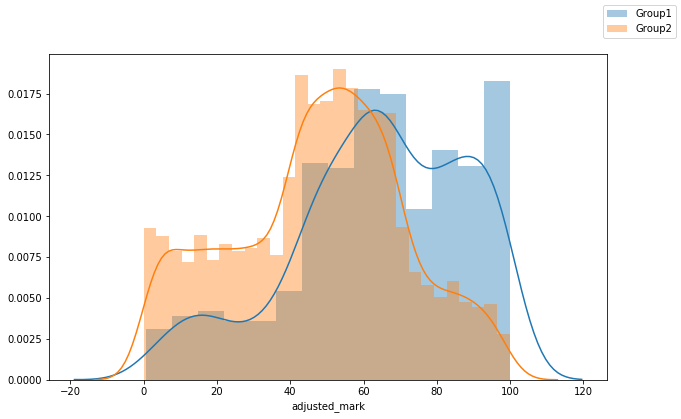

In [30]:
# Draw distribution of adjusted_mark for both groups
fig = plt.figure(figsize=(10,6))
sns.distplot(group1.adjusted_mark)
sns.distplot(group2.adjusted_mark)

fig.legend(labels=['Group1','Group2'])
plt.show()

- As expected, distribution of group1 student marks are shifted to right compared to group2 

In [31]:
# list of tuples that uniquely identifies each element of group1 and group2
g1_key_tuple=list(zip(group1.code_module,group1.code_presentation,group1.id_student))
g2_key_tuple=list(zip(group2.code_module,group2.code_presentation,group2.id_student))

# Filter the virtual learning environment(VLE)-clikcs to keep only group1 and group2 members related
clicks_filtered = clicks[pd.Series(list(zip(clicks['code_module'],\
                                      clicks['code_presentation'],clicks["id_student"]))).isin((g1_key_tuple + g2_key_tuple))]



# Sum up number of clicks for activity types 
summed_clicks = clicks_filtered.groupby(["code_module","code_presentation","id_student","activity_type"])\
    .agg(total_clicks = ("sum_click",sum)).reset_index()


# Create columns for all activity types to store number of clicks as a feature for each student
featured = pd.get_dummies(summed_clicks, columns=["activity_type"], prefix=[""], prefix_sep=[""])
featured = featured.drop_duplicates(subset=['code_module',"code_presentation","id_student"], keep="first")



# assign the number of clicks of each activity to the corresponding column and row 
for i, enrolment in summed_clicks.groupby(["code_module","code_presentation","id_student"], sort=False):
    
    # i = tuple of ("code_module","code_presentation","id_student") for each group
    # enrolment is a DataFrame that contain only one element of groupby object -- one group -- one enrolment
    
    # Find the corresponding row of enrolment in 
    featured.loc[(featured.code_module==i[0])&(featured.code_presentation==i[1])&(featured.id_student==i[2])\
              ,list(enrolment.activity_type)] += list(enrolment.total_clicks)

    
# Calculate total clicks for each enrolment    
featured['total_clicks']=featured.iloc[:,4:].sum(axis=1)

# Join derived features with student demographics for group1
featured = pd.merge(featured, df, on=['code_module',"code_presentation","id_student"])


# Indexes belongs to group1 and group2
g1_index = featured[(pd.Series(list(zip(featured['code_module'],featured['code_presentation'],featured["id_student"])))\
                           .isin((g1_key_tuple)))].index
g2_index = featured.index.difference(g1_index)

# Add a new column to store assigned group
featured.loc[g1_index,'Group'] = "1"
featured.loc[g2_index,'Group'] = "2"

In [32]:
# Difference of correlation values between group1 and group2 on correlation values of adjusted mark with other variables
abs(featured[featured.Group=="1"].corr()["adjusted_mark"]\
    - featured[featured.Group=="2"].corr()["adjusted_mark"]).sort_values().tail(10)

homepage            0.067097
folder              0.068953
mark                0.076662
total_clicks        0.078589
ouwiki              0.092291
resource            0.094320
attempted_weight    0.095162
id_student          0.096995
oucontent           0.138908
repeatactivity           NaN
Name: adjusted_mark, dtype: float64

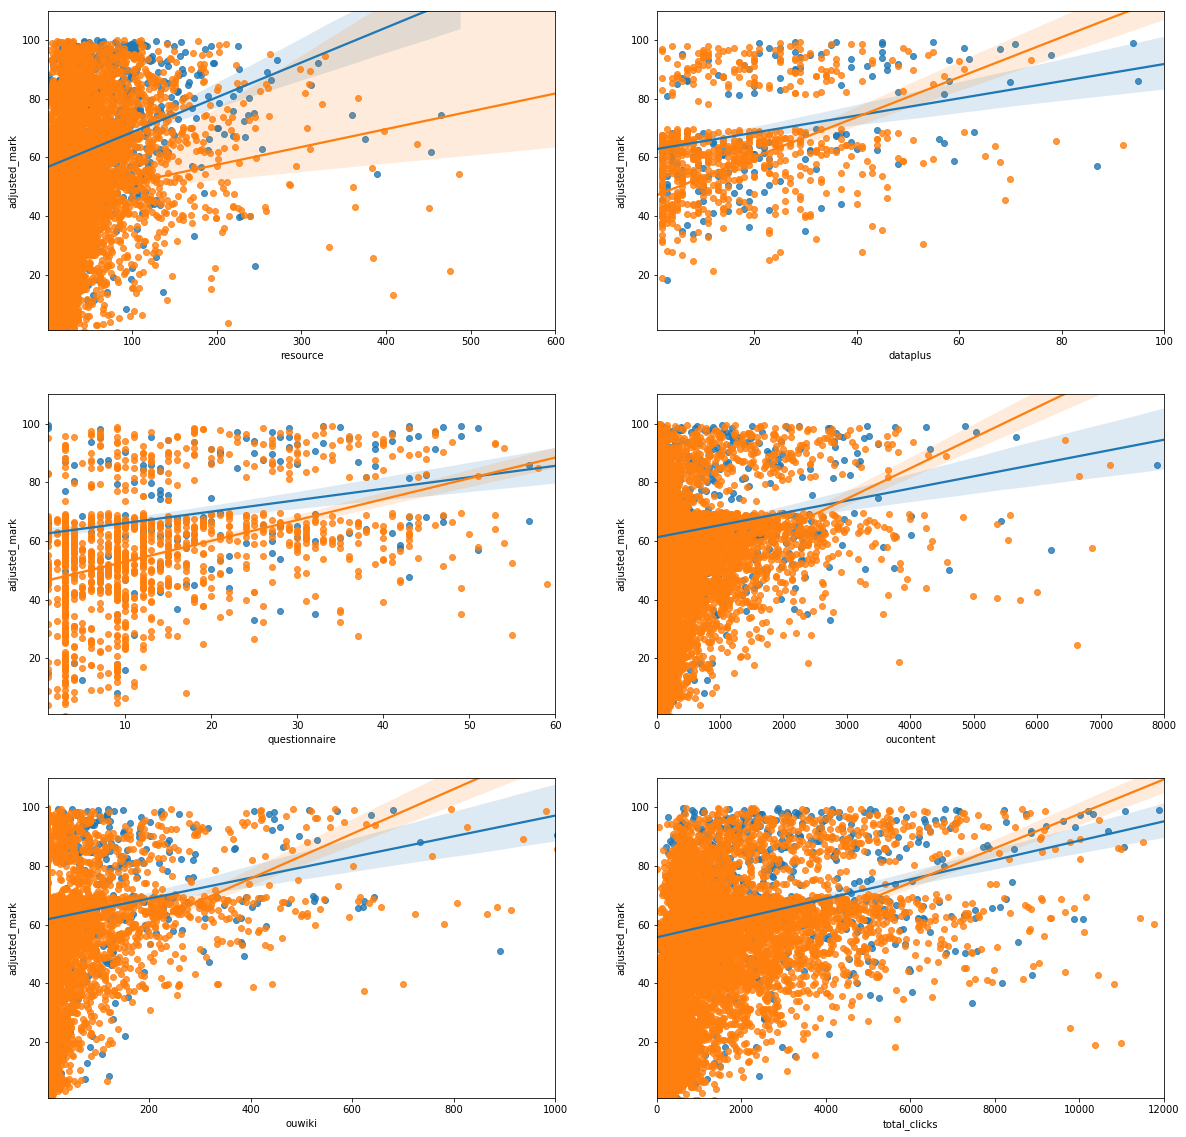

In [33]:
# Create a figure
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Add first subplot to figure
ax = fig.add_subplot(3, 2, 1)
ax1 = sns.regplot(x="resource", y="adjusted_mark" , data=featured[featured.Group=="1"], label="Group 1",ci=95, ax=ax)
ax1 = sns.regplot(x="resource", y="adjusted_mark" , data=featured[(featured.Group=="2")], label= "GRoup 2",ci=95, ax=ax)
ax1.set_xlim(1,600)
ax1.set_ylim(1,110)

# Add second subplot to figure
ax = fig.add_subplot(3, 2, 2)
ax2 = sns.regplot(x="dataplus", y="adjusted_mark" , data=featured[featured.Group=="1"], label="Group 1",ci=95, ax=ax)
ax2 = sns.regplot(x="dataplus", y="adjusted_mark" , data=featured[(featured.Group=="2")], label= "Group 2",ci=95, ax=ax)
ax2.set_xlim(1,100)
ax2.set_ylim(1,110)

# Add third subplot to figure
ax = fig.add_subplot(3, 2, 3)
ax3 = sns.regplot(x="questionnaire", y="adjusted_mark" , data=featured[featured.Group=="1"], label="Group 1",ci=95, ax=ax)
ax3 = sns.regplot(x="questionnaire", y="adjusted_mark" , data=featured[(featured.Group=="2")], label= "GRoup 2",ci=95, ax=ax)
ax3.set_xlim(1,60)
ax3.set_ylim(1,110)


# Add fourth subplot to figure
ax = fig.add_subplot(3, 2, 4)
ax4 = sns.regplot(x="oucontent", y="adjusted_mark" , data=featured[featured.Group=="1"], label="Group 1",ci=95, ax=ax)
ax4 = sns.regplot(x="oucontent", y="adjusted_mark" , data=featured[(featured.Group=="2")], label= "GRoup 2",ci=95, ax=ax)
ax4.set_xlim(1,8000)
ax4.set_ylim(1,110)

# Add fiveth subplot to figure
ax = fig.add_subplot(3, 2, 5)
ax5 = sns.regplot(x="ouwiki", y="adjusted_mark" , data=featured[featured.Group=="1"], label="Group 1",ci=95, ax=ax)
ax5 = sns.regplot(x="ouwiki", y="adjusted_mark" , data=featured[(featured.Group=="2")], label= "GRoup 2",ci=95, ax=ax)
ax5.set_xlim(1,1000)
ax5.set_ylim(1,110)

# Add sixth subplot to figure
ax = fig.add_subplot(3, 2, 6)
ax6 = sns.regplot(x="total_clicks", y="adjusted_mark" , data=featured[featured.Group=="1"], label="Group 1",ci=95, ax=ax)
ax6 = sns.regplot(x="total_clicks", y="adjusted_mark" , data=featured[(featured.Group=="2")], label= "GRoup 2",ci=95, ax=ax)
ax6.set_xlim(0,12000)
ax6.set_ylim(1,110)


plt.show()

From above graphs;
- Except for "resource" page, increasing use of "dataplus","questionnaire", "outcontent" and "ouwiki" creates an increase in the both groups' students' marks though, members of group 1 improve their marks more rapidly compared to group 2 students. Opposite is correct for "resource".

- "total_clicks" is an interesting feature because it can be evaluated as a measure of efficiency. Again, we see that group1 students have a higher rate of mark increase due to unit increase in total_clicks. 

These results suggest that if a student is a member of group2, she/he may consider to use "resource" page to study. This is side of VLE that group2 students benefit more than group1 students. 

On the other hand, group1 students may choose to focus on "outcontent" or "questionnaire" which they create more value spending time in this pages compared to group2 students.

The analysis performed above investigate one aspect in online education --Personalisation-- which can totally change the way we learn in the future. Personalisation is much convinient in online education compared to traditional in-class style. 

**It is important to note that the observed relationship above between student success and type of study resource is a correlation and we are not able establish a causation relationship because it requires a controled study whereas the data is observational.**

**In order to clearly state the differences between causation and correlation, one example could be the relationship between cancer risk of a person and carrying a lighter which is a positive correlation. On the other hand, causation is the relationship between cancer risk and smoking. If we investigate people carrying lighter, we would see that these people would be more likely to get cancer eventhough carrying lighter obviously doesn't have any affect on health.**